# 1. Load dataset

In [1]:
# imort libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'D:\ICT kerala\week10_preprocess\titanic_dataset.csv')

In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 2. Make Passenger id as the index column

In [4]:
data = pd.read_csv(r'D:\ICT kerala\week10_preprocess\titanic_dataset.csv',index_col='PassengerId')

In [5]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 3. Check basic details of the dataset

In [6]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4. Fill in missing values

In [10]:
total_missing = data.isna().sum().sort_values(ascending=False)
percent = (data.isna().sum()/data['Survived'].count()*100).sort_values(ascending=False)
missing_df = pd.concat([total_missing, percent], keys=['total missing values','percentage'],axis=1)
missing_df

,total missing values,percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


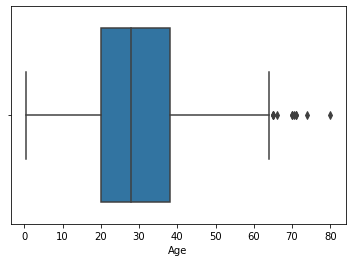

In [11]:
# checking the skewness of the variable Age
sns.boxplot(data['Age'])
plt.show()

Since there are outliers we cannot use the mean for replacing the missing values

<AxesSubplot:xlabel='Age', ylabel='Density'>

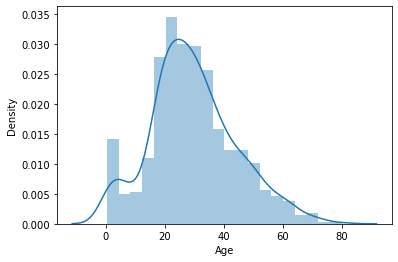

In [12]:
sns.distplot(data['Age'])

In [13]:
print('Skewness of Age is: ',stat.skew(data['Age'].dropna(axis=0)))

Skewness of Age is:  0.3882898514698657


Clearly the distribution is fairly symmetrical.

We can use the median for filling in the missing values.

Here we have to consider the age distribution with respect to other variables also.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

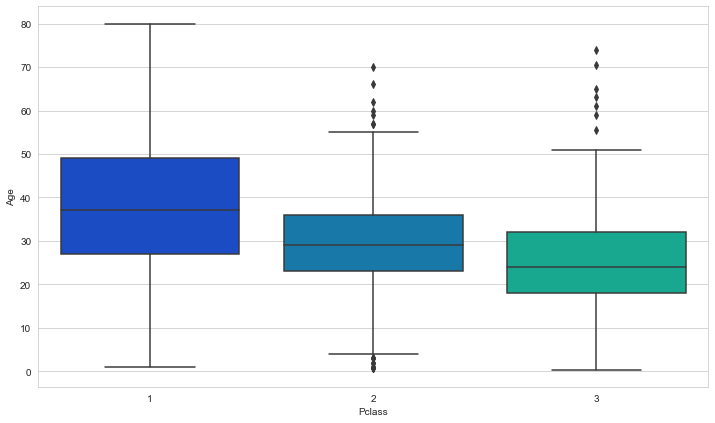

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=data, palette='winter')

In [15]:
data.groupby(['Pclass'])['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [16]:
data.groupby(['Sex'])['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

Now definig a function that can be used to fill in the missing age values according to each passenger class.

In [17]:
def impute_age(x):
    age = x[0]
    pclass = x[1]
    
    if pd.isnull(age):
        if pclass==1:
            return 35
        else:
            return 28
    else:
        return age
        
            

In [18]:
data['Age'] = data[['Age', 'Pclass']].apply(impute_age, axis=1)

In [19]:
data['Age'].isna().sum()

0

The other two variables having missing values is that 'Cabin' and 'Embarked'.

Both are categorical variables.

We can use mode for replacing such missing values.

In [20]:
em = data['Embarked']

In [21]:
em.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [22]:
m = em.mode()
m

0    S
dtype: object

In [23]:
em.fillna(value ='S', axis=0,inplace=True)

In [24]:
em.isna().sum()

0

Since 77% of the Cabin data is missing we can drop that column.

In [25]:
data.drop(['Cabin'], axis=1, inplace=True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 108.9+ KB


# 5. Handle outliers 

In [27]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


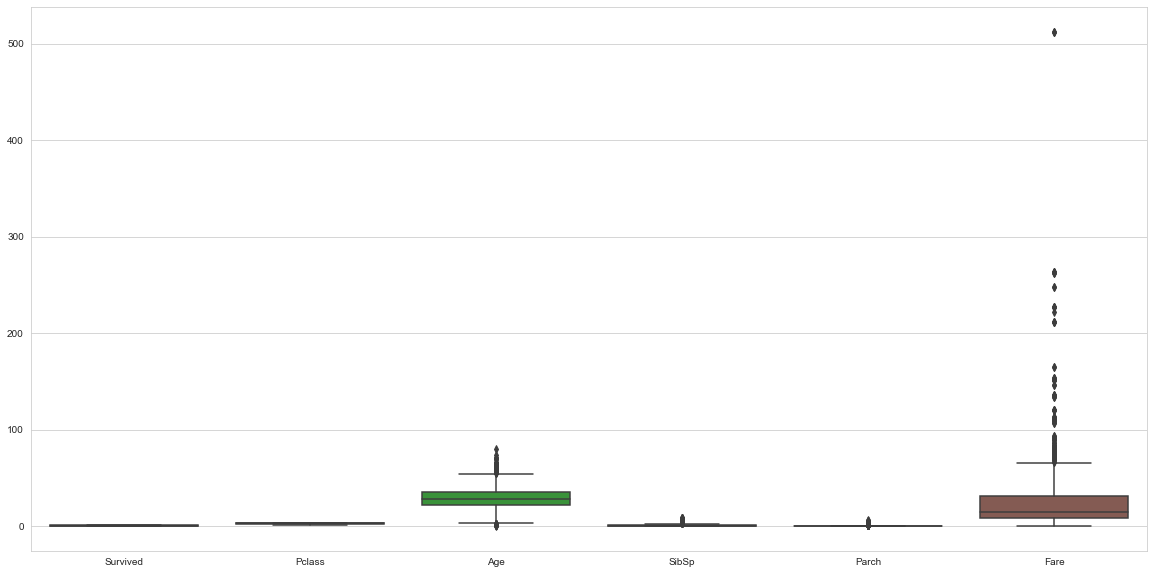

In [28]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data)
plt.show()

There are outliers in Age, SibSp, Parch and Fare columns. Let's consider Age, SibSp and Fare columns for handling the outliers.

In [29]:
# age 
q1_age = np.percentile(data['Age'], 25)
q3_age = np.percentile(data['Age'], 75)
iqr_age = q3_age - q1_age
uplim_age = q3_age + (1.5*iqr_age)
lowlim_age = q1_age - (1.5*iqr_age)
out_age = []
for x in data['Age']:
    if (x>uplim_age) or (x<lowlim_age):
        out_age.append(x)
print(out_age)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


We can replace the outliers with the 10th and 90th percentiles.

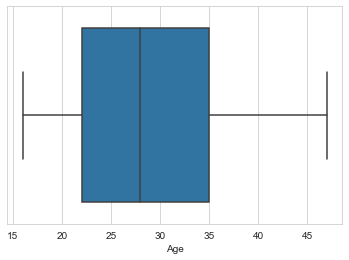

In [30]:
p10_age = np.percentile(data['Age'], 10)
p90_age = np.percentile(data['Age'], 90)
for x in data['Age']:
    if (x<p10_age):
        data['Age'].replace(x, p10_age, inplace=True)
    elif (x>p90_age):
        data['Age'].replace(x, p90_age, inplace=True)

sns.boxplot(data['Age'])
plt.show()

In [31]:
# fare column
q1_f = np.percentile(data['Fare'], 25)
q3_f = np.percentile(data['Fare'], 75)
iqr_f = q3_f - q1_f
uplim_f = q3_f + (1.5*iqr_f)
lowlim_f = q1_f - (1.5*iqr_f)
out_f = []
for x in data['Fare']:
    if (x<lowlim_f) or (x>uplim_f):
        out_f.append(x)
print(out_f)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


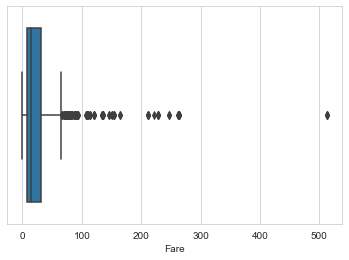

In [32]:
sns.boxplot(data['Fare'])
plt.show()

We are replacing outliers using the percentiles.

In [33]:
print(max(data['Fare']))
print(uplim_f)

512.3292
65.6344


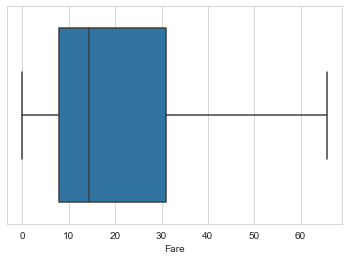

In [34]:
for x in data['Fare']:
    if (x>uplim_f):
        data['Fare'].replace(x, uplim_f, inplace=True)
    elif (x<lowlim_f):
        data['Fare'].replace(x, lowlim_f, inplace=True)
sns.boxplot(data['Fare'])
plt.show()

[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


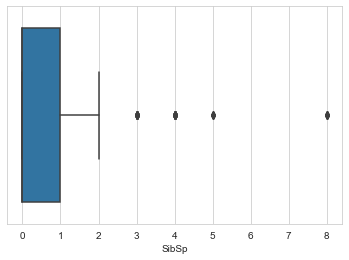

In [35]:
# Considering SibSp column
q1_s = np.percentile(data['SibSp'], 25)
q3_s = np.percentile(data['SibSp'], 75)
iqr_s = q3_s - q1_s
uplim_s = q3_s + (1.5*iqr_s)
lowlim_s = q1_s - (1.5*iqr_s)

out_s = []
for x in data['SibSp']:
    if (x<lowlim_s) or (x>uplim_s):
        out_s.append(x)
print(out_s)

sns.boxplot(data['SibSp'])
plt.show()

In [36]:
for x in data['SibSp']:
    if x>uplim_s:
        data['SibSp'].replace(x, uplim_s, inplace=True)

<AxesSubplot:xlabel='SibSp'>

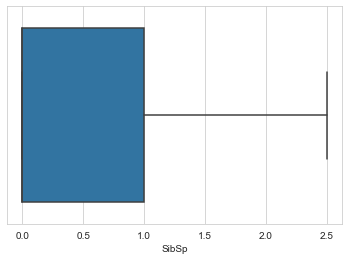

In [37]:
sns.boxplot(data['SibSp'])

The outliers are cleared now.

# 6.  Min max scaling on the feature set

In [38]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [39]:
data.shape

(891, 10)

In [40]:
data['Ticket'].nunique()

681

In [41]:
data['Name'].nunique()

891

Since the variables Name and Ticket having significantly large number of unique values we can drop them.

In [42]:
data.drop(['Name','Ticket'],axis=1, inplace=True)

In [43]:
data.shape

(891, 8)

In [44]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1.0,0,7.2500,S
2,1,1,female,38.0,1.0,0,65.6344,C
3,1,3,female,26.0,0.0,0,7.9250,S
4,1,1,female,35.0,1.0,0,53.1000,S
5,0,3,male,35.0,0.0,0,8.0500,S


We have to apply one hot encoding in the variable Sex and Embarked 

In [45]:
data['Sex'] = pd.get_dummies(data['Sex'], drop_first=True)

In [46]:
data['Embarked'] = pd.get_dummies(data['Embarked'], drop_first=True)

In [47]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1.0,0,7.2500,0
2,1,1,0,38.0,1.0,0,65.6344,0
3,1,3,0,26.0,0.0,0,7.9250,0
4,1,1,0,35.0,1.0,0,53.1000,0
5,0,3,1,35.0,0.0,0,8.0500,0


Taking te Survived column as the target variable we split the data into two

In [48]:
x = data.drop(['Survived'],axis=1)
y = data['Survived']

In [49]:
x.shape

(891, 7)

In [50]:
y.shape

(891,)

In [51]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.0,1.0,0,7.2500,0
2,1,0,38.0,1.0,0,65.6344,0
3,3,0,26.0,0.0,0,7.9250,0
4,1,0,35.0,1.0,0,53.1000,0
5,3,1,35.0,0.0,0,8.0500,0


In [52]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

We first create a logistic regression model using the dta and evaluate the accuracy of the model. Then we apply min max scaling on the feature set and see if there is any effect on the acccuracy of the model. 

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10, test_size=0.25)

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

In [55]:
log_model.fit(x_train, y_train)

LogisticRegression()

In [56]:
y_pred = log_model.predict(x_test)

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
print('MSE is : ', mean_squared_error(y_test, y_pred))

MSE is :  0.17937219730941703


In [59]:
from sklearn.metrics import r2_score

In [60]:
print('Rsq value is : ', r2_score(y_test, y_pred))

Rsq value is :  0.20157536698890077


In [61]:
from sklearn.metrics import accuracy_score

In [62]:
ac =accuracy_score(y_test, y_pred)
ac

0.820627802690583

In [63]:
from sklearn import preprocessing

In [64]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))

In [65]:
x = data.drop(['Survived'],axis=1)

In [66]:
x = min_max.fit_transform(x)

In [67]:
x = pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.647587,0.438561,0.170595,0.063599,0.366375,0.086420
std,0.418036,0.477990,0.307682,0.283298,0.134343,0.312056,0.281141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.193548,0.000000,0.000000,0.120522,0.000000
50%,1.000000,1.000000,0.387097,0.000000,0.000000,0.220223,0.000000
75%,1.000000,1.000000,0.612903,0.400000,0.000000,0.472313,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
model_new = LogisticRegression()

In [69]:
model_new.fit(x_train, y_train)

LogisticRegression()

In [70]:
pred_new = model_new.predict(x_test)

In [71]:
print('MSE is : ', mean_squared_error(y_test, pred_new))

MSE is :  0.17937219730941703


In [72]:
print('RSq value is : ', r2_score(y_test, pred_new))

RSq value is :  0.20157536698890077


In [73]:
ac_new = accuracy_score(y_test, pred_new)
ac_new

0.820627802690583

The accuracy of the model has not changed after minmax scaling. So it has no effect in this case.